**High Flow Rate Chemical Dose Controller Design**

---


Team Members: Ellie Beaudry
              Jillian Foley
              Wenduo Nie

**Introduction:**



The linear chemical dose controller (CDC) is used to dose chemicals easily and accurately. The flow of chemicals is adjusted based on the plant flow rate to keep a constant chemical dose set by the operator.  


The CDC is consisted of the linear flow orifice meter (LFOM) and the “Almost Linear” flow controller. The LFOM is a pipe with rows of holes (orifices) on it. As shown in figure 1, there are fewer holes on the top and more holes on the bottom of the pipe. All holes have the same size. Calculations need to be done to determine the number of holes on each row. Water flows down the LFOM in the set up. 

\

![alt text](https://raw.githubusercontent.com/eb562/Final-Design-Project/master/LFOM%20diagram.jpg)



_Figure 1. linear flow orifice meter_

\
 “Almost linear” flow controller consists of constant head tank (CHT), a float valve and a flexible tube at the bottom of CHT. The float valve is used to keep the solution in CHT at a constant water level. Above the CHT, there is a stock tank that stores chemical solutions. There is a different tube connects the stock tank and the float valve. 


Now let’s look at the entire CDC set up. Please refer to the diagram in figure 2. Start at the Constant Head Tank (CHT). We use a tube with large diameter to connect the bottom of  CHT because we want to minimize the head loss. We chose to use three thin, straight tubes instead of one tube because we want to generate major losses instead of minor losses, and this will ensure the Hagen-Poiseuille equation being applicable. In this case, the flow will be directly proportional to the head.

\

![alt text](https://raw.githubusercontent.com/eb562/Final-Design-Project/master/CDC%20diagram.jpg)



_Figure 2. the entire set up of CDC_

\

The chemicals flow out through the large-diameter tube on the right of the three tubes mentioned above. The end of this large tube is connected to a slider and a drop tube. When the chemical enters the drop tube it falls freely and no longer affects the CDC system.


The slider is rested on a lever. LFOM adjusted the water level in the entrance tank, and the leveler connects the water level to the difference in head between the CHT and the end of the dosing tube. This enables CDC to automatically adjust the flow of chemicals based on a change in the plant flow rate and maintain a constant dose in the plant water. At one end of the lever, a float is used to track the water level in the entrance tank. The counterweight on the other side of the lever makes the float *track the water surface*. 


For this project, we want to design a CDC that allows a larger flow (more than 100 L/s) because now the the plant is aimed to serve a city instead of a small town, and the water flow will be much greater.  This may change the current design significantly because at a certain flow rate we will need to change to a larger float valve.  In addition, we need to keep the flow in the dosing tubes laminar to maintain a linear relationship between headloss and flow.  With a higher flowrate, the velocity and/or the diameter will need to be increased and this will lead to a higher Reynolds number.  This will impact the number of dosing tubes used. The current design uses three dosing tubes based on the minor loss constraints and the required flow rate of the current AguaClara plants.  If we were to change the 3 short tubes into one long one, that would increase the flow and therefore the velocity through the dosing tube.  Since we are trying to keep minor loses minimal to achieve a linear relationship between headloss and flow, increasing the velocity would change the ratio betwee minor losses and major losses as minor losses scale with v^2 and major losses scale with v. 


\


**Constraints:**

1.   Size of float valve must be appropriate to the flow and based on standard manufactured sizings
2.   Laminar flow should be maintained in the dosing tubes to preserve a linear relationship between headloss and flowrate 
3.   Completely operable without the use of electricity (current design is powered by a headloss of 20 cm so we want to keep that as a target for energy usage)
4.   Error due to minor losses below 10%
5.   Should be able to operate for plant flow rates of at least 430 L/s
6.   Size of dose controller (length and width) should fit in plant
7.   The dose controller should either be made out of materials available in Honduras so it can be constructed there or the cost of shipping pre-manufactured components should be reasonable
8.   The plant operator should be able to easily change the coagulant dose










In [0]:
!pip install aguaclara

In [0]:
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

**Current AguaClara Design**

First we calculated the current number of dosing tubes given 430 L/s flow. 
Our assumptions are that the stock concentration is 180 g/L, the max stock concentration dose is 40 mg/L as PACL, the max head loss is 20 cm, temperature is 20degC and the minor loss coefficient for the dosing tubes is 3. We are currently assuming that the diameter of the dosing tubes is 1/8 in. [FCM DC](https://colab.research.google.com/github/aguaclara/CEE4520/blob/master/DC/FCM_DC.ipynb)

In [0]:
temp = 20* u.celsius 
c_stock = 180 * (u.g/u.L)
dose_max = 40 * (u.mg/u.L)
K_minor = 2
roughness = 0
hl = 20 * u.cm
Q = 430 * (u.L/u.s)


my_cdc=ac.CDC(hl=20*u.cm,q=Q,coag_dose_conc_max=dose_max,temp=temp,tube_k=K_minor,coag_stock_conc_est=c_stock)
diam = my_cdc.coag_tube_id
num=my_cdc.coag_tubes_active_n
length = my_cdc.coag_tube_l
print('The diameter would be', diam)
print('The number of dosing tubes is', num)
print('The length of the dosing tube is', length)
print('The flow rate through each dosing tube is', (my_cdc._coag_tube_q_max).to(u.mL/u.s))

The diameter would be 0.125 inch
The number of dosing tubes is 41 dimensionless
The length of the dosing tube is 1.257 meter
The flow rate through each dosing tube is 3.506 milliliter / second


The plant would need 41 dosing tubes running at all times to handle a flow of 430 L/s and 42 tubes constructed in total. This would not make sense to implement at the plant and would be impossible for the operator to keep up with. 

We checked the current code for Reynolds number constraint assuming a pipe roughness of 0.


In [0]:
nu = my_cdc.coag_stock_nu
flow = my_cdc._coag_tube_q_max
rey = ac.re_pipe(flow, diam, nu)
print('The Reynolds number is', ac.round_sig_figs(rey,4))

The Reynolds number is 1401.0


The Reynolds number is 1401 which is laminat because it is below the transition point of 2100. We want the flow in the tubes to be laminar so that there is a linear relationship between head loss and flow. The current design meets this requirement so the limiting factor is the number of dosing tubes. 

We then used a larger diameter for the coagulant tubes while keeping the head loss at 20 cm to see if increasing the diameter will improve the design. 

In [0]:
#setting the diameter to be a larger value
large_Diam = 10 * u.mm

highflow_cdc=ac.CDC(hl=hl,q=Q,coag_dose_conc_max=dose_max,temp=temp,tube_k=K_minor,coag_stock_conc_est=c_stock,coag_tube_id=large_Diam)
print('The number of dosing tubes needed is', highflow_cdc.coag_tubes_active_n)
print('The dosing tube length would be', highflow_cdc.coag_tube_l)
print('The flow through each tube would be', highflow_cdc._coag_tube_q_max.to_base_units())

highflow_nu = highflow_cdc.coag_stock_nu
rey_new = ac.re_pipe(highflow_cdc._coag_tube_q_max, highflow_cdc.coag_tube_id, highflow_nu)
print('The Reynolds number in the pipe would be', ac.round_sig_figs(rey_new,4))


The number of dosing tubes needed is 5 dimensionless
The dosing tube length would be 15.61 meter
The flow through each tube would be 3.478e-05 meter ** 3 / second
The Reynolds number in the pipe would be 4413.0


Increasing the diameter lowers the number of coagulant tubes to 5 but increases the dosing tube length to 15.6 meters which is not reasonable to implement. The length of the coagulant tubes is limited by the size of the plant. The actual length of the tubes would be longer than 15.6m because there is currently a bug in the CDC code that fails to check the Reynolds number constraint for laminar flow. In order to meet this constraint, the tubes would have to be even longer to get the desired flow. Since the tubes are already too long, using this method would not be possible for a plant of this size. In addition, the flow would be turbulent which is not desirable for the design because we want to maintain a linear relationship. Therefore, just increasing the diameter of the coagulant tubes to account for the higher flows is not enough. 

Finally, we would want to update the current CDC code to correct for the Reynolds number constraint. To do this we would have to add a check within the CDC object code to check the Reynolds number within the object. We submitted a GitHub request for the addition of a Reynold's number constraint and wrote the necessary code that can be added to the CDC class:  [AguaClara GitHub](https://github.com/AguaClara/aguaclara/issues/257)

**Alternative Dosing Systems**

|System|Dilution Range|Water Flow Range (LPS)|Dimensions (cm)|Weight (kg)|Weight (kg)|Operating Pressure (kPa)|Pressure loss (kPa)|Max Temp (deg C)|
|---|---|---|---|---|---|---|---|---|
|[Dosatron]( https://www.dosatronusa.com/d25re09/) D40WL3000NAF|.03-.125%|0.138-2.52|66.99 x 21.59|5.44|5.44|15.2-800|40-140|40|
|[MixRite]( https://www.adtec.gr/products/en/water-powered-chemical-dosing-pump/water-powered-dosing-pump-dilution-p-2064.html) 575 Chlorine Model|3-10%|0.00556-0.694|55.6 x 16.02|1.25|1.25|20-827|100|50|
|[Gator XL](http://www.gatorxl.com/Specifications.html.) 8001XL|0.75%, 1.0%, 1.5%, 2.0%|.00211-0.631|61 x 25|2.82|2.82|21-827|103|-|
|[Superdos45]( https://hydrosystemseurope.com/product/superdos/) 113715GB|0.4-5%|.0158-2.78|-|-|-|40-550|-|38|


\
All the dosing systems compared in the table above are variations on water powered chemical injection devices, and do not require electricity to run. However, they operate with much smaller flowrates than the Aguaclara dosing controller, with the maximum flowrate of 2.78 liters/second handled by the Superdos45 system. In water treatment applications, these dose controllers require a bypass system, where a percentage of the flow is directed into the chemical injection unit. For a 430 L/s plant, this percentage would range from approximately .1-.6% of the plant flow rate. The concentration is diluted from stock concentration when injected into the diverted flow and then mixed back into the rest of the flow downstream to give the desired coagulant or chlorine dosage. Separate dose controllers would be required for chlorine and coagulant. As creating the bypass creates added construction cost and diverting the flow so that the dosage remains proportional to the overall plant flowrate is not a trivial challenge, these systems do not seem like feasible alternatives to Aguaclara’s dose controller. However, if one of the above systems were to be chosen, the MixRite system has the largest dilution range out of all the systems, giving the plant operator’s greatest control over chemical dosing. Another important consideration would be the head loss going through the dose controller, represented in the chart by the pressure loss through their respective systems. The aguaclara system currently operates with about 20 cm of headloss, which corresponds to a pressure loss of 1.9 kPa (calculations below). The alternative systems with pressure loss available require almost 100 times more head to operate. This high energy requirement is not feasible in aguaclara plants.

In [0]:
#Calculating pressure drop through CDC
temp_min=10*u.celsius
average_hl= 20*u.cm
CDC_pressure_drop= average_hl*ac.density_water(temp_min)*ac.gravity
print("The pressure drop through AguaClara's dose controller is",CDC_pressure_drop.to(u.kilopascal))

The pressure drop through AguaClara's dose controller is 1.961 kilopascal


**Summary of Current CDC Failures**

The current CDC design is not feasible for larger plants with larger flows. The number of tubes that the current design proposes for this flow is 41 tube which would be too many for the operator to manage since the tubes will need to be cleaned regularly as they can clog. When we increased the diameter to be larger, the flow through the dosing tubes became turbulent. Since we want the relationship between headloss and flow to be linear, we cannot have turbulent flow through these tubes. Therefore, the current design is not viable for a 430 L/s flow.  

We looked into commercially available alternative dosing systems but they all required the addition of a bypass system so that only a portion of the flow goes through the device at a time. Adding in a bypass system would be costly and require changes to the plant infrastructure which is not ideal. Finally, the high energy requirements of these devices make them unattractive for use in AguaClara plants.

Based on these failures, we have to reconsider various aspects of the current CDC design that would need to be changed for higher flow rates. This includes sizing the float valves for larger flows, changing the dimensions of the CDC tubing, implementing a new geometry for how the coagulant tubes are arranged and changing the size of the float to balance the dosing meter. 

**Float Valve Sizing:**
\
A float valve should be able to produce the max dosage at a minimum headloss of 30 cm. From the [FCM DC](https://colab.research.google.com/github/aguaclara/CEE4520/blob/master/DC/FCM_DC.ipynb), the max coagulant dose is 40 mg/L and the stock concentration is 180 g/L

Standard diameters of float valve orifices were found [here](http://www.cdivalve.com/brands/kerick-valve).  Kerick valves were used because they are chlorine resistent.

Instead of the pressure constraints given by the float valve manufacturer, we used the orifice equation to determine the flow rate through the valve as the pressure in our system is always much less than the pressures the float valves are design to handle.

[Orifice Equation](https://aguaclara.github.io/Textbook/Review/Review_Fluid_Mechanics.html#equation-orifice-equation):
$$Q = \Pi_{vc} A_{or} \sqrt{2g\Delta h}$$

You need to change to a 1 in float valve when the plant flow rate goes above 3485 liter / second


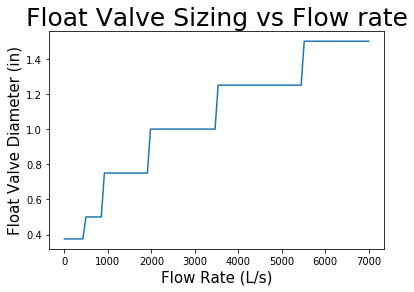

In [0]:
delta_h=30*u.cm
Q_plant= np.linspace(0,7000,num=100)*(u.L/u.s)
def diam_float(Q_plant,dose_max,c_stock,delta_h):
#returns standard float valve sizing in inches.  If flow is too great for standard sizing, returns -1
  Q_stock=(Q_plant*dose_max)/c_stock
  diam_min=((2*np.sqrt(Q_stock/(ac.VC_ORIFICE_RATIO*np.pi*np.sqrt(2*ac.gravity*delta_h)))).to(u.inch)).magnitude
  diam_standard=[3/8,1/2,3/4,1,1.25,1.5]*u.inch
  diam=-1*u.inch
  for i in range(0,6):
    if diam.magnitude == -1:
      if diam_min < diam_standard[i].magnitude:
        diam=diam_standard[i]
  return diam
f_size=np.zeros(100)*u.inch
for i in range(0,100):
  f_size[i]=diam_float(Q_plant[i],dose_max,c_stock,delta_h)

plt.plot(Q_plant,f_size)
plt.xlabel("Flow Rate (L/s)", fontsize=15)
plt.ylabel("Float Valve Diameter (in)", fontsize=15)
plt.title("Float Valve Sizing vs Flow rate", fontsize=25)

#calculate exact flow rate when you need to change to a 1 in float valve
d_small=1*u.inch
Q_stock_big=ac.VC_ORIFICE_RATIO*np.pi*(d_small/2)**2*np.sqrt(2*ac.gravity*delta_h)
Q_plant_big=(Q_stock_big*c_stock)/dose_max
print("You need to change to a 1 in float valve when the plant flow rate goes above", Q_plant_big.to(u.L/u.s))

**CDC Tubing Design:**

With a higher flow rate, the headloss through the additional tubing that delivers the chemical to and from the dosing tubes must be kept to less than 1 cm (5% of the 20 cm design headloss through the dosing tubes).  This includes the long straight tube bringing the chemical from the constant head tank to the dosing tubes, the rigid tube bringing the chemical from the dosing tubes to the meter, the flexible tubing attached to the meter that allows the plant operator to move the dosing meter, and the tubing that brings the chemical from the bottom of the drop tube to the LFOM.    

The dimensions of L1 and L2, as labeled in the image below, are estimated as 1.5m and 0.5m, although this would change based on where and how the CDC is installed in a particular plant. The straight, larger pipe lenghth is 2*L1, accounting for the piping on both sides of the dosing tubes, and the flexible tubing is 0.5 m long to give enough slack to allow the tubing to move up and down the 0.5 m long dosing meter. Flow through the drop tube is open channel to make sure the height of water in the LFOM does not feed back into the CDC flow so the only other pipe flow is through the one delivering the chemical from the bottom of the drop tube to the LFOM, which is a length of L2.  This design uses the same diameter flexible tubing as the rigid pipe to minimize headloss from an unneccessary flow contraction.  Additionally, all tubing is made out of pvc to ensure chlorine resistance.

![alt text](https://github.com/eb562/Final-Design-Project/blob/master/CDC%20tubing%20diagram.PNG?raw=true)

The fluid makes one 180 degree bend going from the rigid to the flexible tubing, which gives a conservative estimate of the minor loss coefficient of 1.5 ([Engineering Toolbox](https://www.engineeringtoolbox.com/minor-loss-coefficients-pipes-d_626.html)). The k-values to exit into the drop tube and then enter into the last pipe are both estimated as 1 giving a total minor loss coeficient of 3.5. The minor losses of the fluid entering and exiting the dosing tubes is included in the k-value for the dosing tube design.

**Set Plant Flow Rate**

In [0]:
Q_plant_design=430*u.L/u.s
Q_stock_design= (Q_plant_design*dose_max)/c_stock
print("The total flow rate that will go through all the dosing tubes is calculated and names as Q_stock_design, which is",Q_stock_design.to(u.ml/u.s))

The total flow rate that will go through all the dosing tubes is calculated and names as Q_stock_design, which is 44.44 milliliter / second


The total flow rate that will go through all the dosing tubes is calculated and names as Q_stock_design, which is 95.56 ml/sec. 

In [0]:
L1=1.5*u.m
L2=0.5*u.m
L_meter=0.5*u.m

L_total=2*L1+L2+L_meter
k_tubing=3.5
temp_min=10*u.celsius
hl_constraint=.05*20*u.cm
nu_max=ac.viscosity_kinematic(temp_min)


diam_piping=ac.diam_pipe(Q_stock_design,hl_constraint,L_total,nu_max,roughness,k_tubing)
print("The diameter of the piping for a plant low rate of",Q_plant_design,"is",diam_piping.to(u.cm))


The diameter of the piping for a plant low rate of 200 liter / second is 2.043 centimeter


**New Dosing Tube Geometry**

We proposed several plans to reach desired headloss (20 cm) with resonable costs and dimensions. 

Plan A is to have a big PVC pipe filled with multiple smaller and flexible PVC tubes (see diagram below). Since the smaller PVC tubes are flexible, the voids in between small tubes can be neglected during calculation. The thickness of the selected PVC tube is 1/16 inches. This is one of the thinnest PVC tubes we can find on market that meet the length requirement. Although straws are thinner, we can not find long enough (more than 1 m) straws with thin walls on market. We thus stayed with the 1/8'' inner diameter, 1/4'' outer diameter and 1/16'' thickness PVC pipe. The price of the small tubes is also relatively cheap. For 50 ft of 1/8'' x 1/4'' tubes, the cost is $33.6. The link below shows one possible purchase choice.

https://www.coleparmer.com/i/cole-parmer-pvc-tubing-1-8-x-1-4-50-ft-pk/9660501?PubID=UX&persist=true&ip=no&gclid=EAIaIQobChMI2pv7lO355QIVEz0MCh3HKQBzEAkYAiABEgJaz_D_BwE

![alt text](https://github.com/eb562/Final-Design-Project/blob/master/CDC%20cross%20section%201.JPG?raw=true)

Plan B is to have a PVC pipe with dividers inside. However, this kind of pipe can be hardly found on the market.

![alt text](https://github.com/eb562/Final-Design-Project/blob/master/CDC%20cross%20section%202.JPG?raw=true)

Plan C is to use reticulated foam. After checking the price of reticulated foam, we realize that this option will be too pricy compared to plan A. The link below shows one possible purchase choice.

https://cleverbrand.com/products/reticulated-foam-sheets-12-wide-x-4-ft-long?gclid=EAIaIQobChMI05fH-Mj55QIVgZ6zCh0mSQWMEAAYASAAEgI_rPD_BwE


Overall, plan A is the easiest and cheapest way to reach desired headloss. We thus make designs and calculations based on plan A. 

We first calculated the flow rate within each smaller tube based on inner diameter of small tube and the desired headloss. 

For calculation purpose, we assume coefficient of minor loss to be 2 (1 for entrance and 1 for exit). We understand that if we use reducer to connect from bigger pipes to smaller pipes, there would be vena contracta, which will change the value of coefficient of minor loss. However, it's hard for us to quantify the value, so for the calculations below, we stay with using 2 as the value. 

The equation we used here to calculate the flow rate within each small tube based on desired headloss is:

$$Q_{Max, \, Tube} = \frac{\pi D^2}{4} \sqrt{\frac{2 h_L g \Pi_{Error}}{\sum{K} }}$$


In [0]:
# Plan No.1: inner diameter of the small tube is 1/8 inches
#smaller tube inner diameter = sm_inner
SDR =35

sm_inner = 1/8 * u.inch
error = 0.1
g= ac.gravity
KMinor=2
hl_design = 20 *u.cm
Q_max_tube = (math.pi * sm_inner **2 / 4 ) * np.sqrt(2* hl_design *g* error) /np.sqrt(KMinor)
print('According to headloss constraint, the flow rate that go through each small tube with 1/8 inches inner diameter is',Q_max_tube.to(u.ml/u.s))


A_1_8 = math.pi * (sm_inner / 2) ** 2
Velocity_1_8 = Q_max_tube / A_1_8
print ('The unadjusted velocity of the fluid inside the small tubes with 1/8 inches inner diameter is', Velocity_1_8.to(u.m/u.s))
Re_1_8 = ac.density_water(temp_min) * Velocity_1_8 * sm_inner / ac.viscosity_dynamic (temp_min)
print('The unadjusted Reynolds number for 1/8 inches diameter is', Re_1_8.to_base_units())

if Re_1_8 > 2100:
  Velocity_1_8 = 2100/ac.density_water(temp_min)/new_sm_inner*ac.viscosity_dynamic (temp_min)
  print('The adjusted velocity that fits laminar constraint is', Velocity_1_8.to(u.m/u.s))
  Q_max_tube = Velocity_1_8* A_1_8
  print('The adjusted flow rate inside small tubes that fits laminar constraint is', Q_max_tube.to(u.ml/u.s))

n_tubes = np.ceil(Q_stock_design/Q_max_tube)
n=np.ceil(n_tubes.to_base_units()) #number of smaller tubes = n
print('The number of small tubes with 1/8 inches diameter needed is', n)
print('The calculated number of tubes is different from previous section because instead of using the flow rate of the plant, 430 L/sec, we used the flow rate of the design stock, which is 95.56 ml/sec.')


According to headloss constraint, the flow rate that go through each small tube with 1/8 inches inner diameter is 3.506 milliliter / second
The unadjusted velocity of the fluid inside the small tubes with 1/8 inches inner diameter is 0.4429 meter / second
The unadjusted Reynolds number for 1/8 inches diameter is 1082 dimensionless
The number of small tubes with 1/8 inches diameter needed is 13 dimensionless
The calculated number of tubes is different from previous section because instead of using the flow rate of the plant, 430 L/sec, we used the flow rate of the design stock, which is 95.56 ml/sec.


In [0]:
#now we check out a different diameter for the smaller inner diameter of the tubes to compare the two plans.
#plan No.2: inner diameter of the small tube is 1/4 inches
new_sm_inner = 1/4 * u.inch
new_Q_max_tube = (math.pi * new_sm_inner **2 / 4 ) * np.sqrt(2* hl_design *g* error) /np.sqrt(KMinor)

print('According to equation that check headloss constraint, the flow rate that go through each small tube with 1/4 inches inner diameter is',new_Q_max_tube.to(u.ml/u.s))
A_1_4 = math.pi * (new_sm_inner / 2) ** 2
Velocity_1_4 = new_Q_max_tube / A_1_4
print ('The unadjusted velocity of the fluid inside the small tubes with 1/4 inches inner diameter is', Velocity_1_4.to(u.m/u.s))

Re_1_4 = ac.density_water(temp_min) * Velocity_1_4 * new_sm_inner / ac.viscosity_dynamic (temp_min)
print('The unadjusted Reynolds number for 1/4 inches diameter is', Re_1_4.to_base_units(), ', which is greater than the laminar flow constraint of Reynolds number (2100), so we need to adjust velocity based on Reynolds number constraint.')

if Re_1_4 > 2100:
  Velocity_1_4 = 2100/ac.density_water(temp_min)/new_sm_inner*ac.viscosity_dynamic (temp_min)
  print('The adjusted velocity that fits laminar constraint is', Velocity_1_4.to(u.m/u.s))
  new_Q_max_tube = Velocity_1_4* A_1_4
  print('The adjusted flow rate inside small tubes that fits laminar constraint is', new_Q_max_tube.to(u.ml/u.s))

new_n_tubes = np.ceil(Q_stock_design/new_Q_max_tube)
new_n=np.ceil(new_n_tubes.to_base_units()) #number of smaller tubes = n
print('The number of small tubes with 1/4 inches diameter needed is', new_n)

According to equation that check headloss constraint, the flow rate that go through each small tube with 1/4 inches inner diameter is 14.03 milliliter / second
The unadjusted velocity of the fluid inside the small tubes with 1/4 inches inner diameter is 0.4429 meter / second
The unadjusted Reynolds number for 1/4 inches diameter is 2163 dimensionless , which is greater than the laminar flow constraint of Reynolds number (2100), so we need to adjust velocity based on Reynolds number constraint.
The adjusted velocity that fits laminar constraint is 0.4299 meter / second
The adjusted flow rate inside small tubes that fits laminar constraint is 13.61 milliliter / second
The number of small tubes with 1/4 inches diameter needed is 4 dimensionless


After figuring out above numbers, we need to calculate the minimum length of dosing tubes to reach desired headloss.

In [0]:
#L_min: minimum length of dosing tubes
L_min = (g*hl_design * math.pi * sm_inner ** 4)/(128* nu_max* Q_max_tube) - (Q_max_tube/(16 * math.pi * nu_max)*KMinor)
print('The minimum length of the dosing tube with 1/8 inches as small inner diameter is', L_min.to(u.m))

new_L_min = (g*hl_design * math.pi * new_sm_inner ** 4)/(128* nu_max* new_Q_max_tube) - (new_Q_max_tube/(16 * math.pi * nu_max)*KMinor)
print('The minimum length of the dosing tube with 1/4 inches as small inner diameter is', new_L_min.to(u.m))


The minimum length of the dosing tube with 1/8 inches as small inner diameter is 0.9659 meter
The minimum length of the dosing tube with 1/4 inches as small inner diameter is 4.006 meter


From the calculations above, we can see that, according to equation for headloss constraint, the calculated Reynolds number for 1/4 inches diameter case is greater than the laminar flow constraint. Thus we needed to adjust the velocity. 

With adjusted velocity and adjusted flow rate within tubes, we calculated the minimum required length for 1/4 inches diameter tubes, which is much longer than that of 1/8 inches. 

We thus conclude that it's not worth to go with 1/4 inches or bigger for small tubes. 1/8 inches is a decent choice for inner diameters of small tubes. 

After choosing the inner diameter of the small tubes, we want to see what is the inner diameter of the big pipe we should choose. 

We want at least two big pipes so we can adjust valve and shut down one of them during low flow rate time period. We also want one additional pipe as backup so the two-pipe system can keep going when we take down one pipe for cleaning. We thus determine that we will need at least 3 big pipes to start with. We want to choose a big pipe size that works for above constraints and settle with it. When the total flow rate for the plant increase, we will increase the number of big pipes. 

In [0]:

#smaller tube outer diameter = sm_outer
#big tube inner diameter = big_ID
#All assumptions below are based on 430 L/s flow rate for us to first decide an inner diameter for the big pipe. 

sm_outer = 1/4 * u.inch
Area_small = math.pi * (sm_outer/2) **2
proposed_Area_big = np.ceil(n/3)* Area_small
proposed_big_inner= np.sqrt(proposed_Area_big / math.pi) * 2
print('The proposed inner diameter of the big pipe should be at least', proposed_big_inner)

print('Available inner diameter of manufactured pipes:', ac.ID_SDR_all_available(35).magnitude)
# The closest inner diameter available is 0.792 inches. Thus we choose all our big pipes to be 0.792 inches as inner diameter:

big_ID = 0.792 * u.inch
Area_big = math.pi * (big_ID/2)**2
number_in_each_pipe = Area_big / Area_small
print('The big pipe each can hold at most', number_in_each_pipe, 'smaller pipes, which fits our design idea of having 3 big pipes at 430 L/s flow rate to start with.')

number_of_big_pipe = np.ceil(n/number_in_each_pipe)
if n > 30:
  number_of_big_pipe = np.ceil(n/10)

print('Number of big pipe needed is', number_of_big_pipe)





The proposed inner diameter of the big pipe should be at least 0.559 inch
Available inner diameter of manufactured pipes: [ 0.792       1.23985714  1.79142857  2.23928571  3.3         4.24285714
  6.24642857  8.13214286 10.13571429 12.02142857 15.08571429 16.97142857
 22.62857143 28.28571429 33.94285714 45.25714286 56.57142857 67.88571429]
The big pipe each can hold at most 10.04 dimensionless smaller pipes, which fits our design idea of having 3 big pipes at 430 L/s flow rate to start with.
Number of big pipe needed is 2 dimensionless


We plug all the numbers back into the Aguaclara headloss functions to see if the designs we made so far would let us reach our desired headloss.

In [0]:
#This section is to check if our design works

Roughness = 0 

flow_rate = Q_max_tube 
length = L_min 

#major headloss from one small tube:
major_headloss = ac.headloss_fric(flow_rate, sm_inner,length,nu_max, Roughness)
print ('Major headloss from one small tube is',ac.round_sig_figs(major_headloss, 4))


#minor headloss from one small tube:
minor_headloss = ac.headloss_exp(flow_rate, sm_inner,KMinor)
print ('Minor headloss from one small tube is',ac.round_sig_figs(minor_headloss, 3))
print('After calculation, the total headloss matches our desired headloss, which is 20 cm.')

#compare if the length of the dosing tube is shorter than the flocculator
myF = ac.Flocculator(q=Q_plant_design)
print('The length of the first channel occupied by the entrance tank is',myF.ent_l,', which is longer than the length of the dosing tube. So our design will work.')
#compare in text box

Major headloss from one small tube is 0.18 meter
Minor headloss from one small tube is 0.02 meter
After calculation, the total headloss matches our desired headloss, which is 20 cm.
The length of the first channel occupied by the entrance tank is 1.5 meter , which is longer than the length of the dosing tube. So our design will work.


We want to have an rough estimation on the cost of our small tubes to make sure the price is reasonable. We used the price from an online vendor to make the calculation. The link was posted above. 

In [0]:
#cost calculator for small tubes
total_price = 33.6 *u.dollar
tube_length = 50 *u.ft #from the vendor

unit_price = total_price / tube_length
print('Unit price of smaller tube is',unit_price)
total_length = n * L_min

#total cost for all small tubes is:
total_cost_sm_tube = total_length * unit_price
print('Total cost for all smaller tubes is',total_cost_sm_tube.to(u.dollar))

Unit price of smaller tube is 0.672 dollar / foot
Total cost for all smaller tubes is 27.68 dollar


After calculation, we can conclude that plan A is feasible and the cost is reasonable. 

**Float sizing**

The size of the float depends on the difference in torque applied by the flexible tubing when the dosage is set to the minimum and maximum positions on the meter.  The diagram below shows the force balance on the float.  We want to design the float so that it only moves 1 cm up or down (shift) in the water when going from the two extreme positions.  If we attach the drop tube to the side of the entrance tank, the weight of the tubing only consists of the 0.5m flexible tubing and the water inside that tube.  The green ticks in the diagram below indicate where the tubing is attached.

Difference in Torque applied by the tubing is:
$$\Delta T_{T}=Weight_{tubing}*L_{meter}$$
This assumes that when the dose is set to 0, the weight of the tubing is applied at the fulcrum so it exerts no torque.

The Difference in Torque applied by the changing bouyancy force is:
$$\Delta T_{B}=shift*\pi r_{float}^{} 2*\rho _{water}g*L_{meter}$$

Set these two torques equal to eachother to solve for the required radius of the float.

The resultant equation for the radius is:
$$r_{float}=(\frac{W_{tubing}}{shift*\Pi *\rho _{water}*g})^{1/2}$$

\
Low Dosage:
![alt text](https://raw.githubusercontent.com/eb562/Final-Design-Project/master/Float%20balance%20low%20dosage.PNG)

High Dosage:
![alt text](https://raw.githubusercontent.com/eb562/Final-Design-Project/master/Float%20Force%20Balance%20high%20dosage.png)

The density of PVC is approximately 1.3 g/cm^3 ([Omnexus](https://omnexus.specialchem.com/selection-guide/polyvinyl-chloride-pvc-plastic))

The float is modeled as a cylinder.  The below calculations give the required radius of the float.


In [0]:
SDR=35 #arbitrary SDR chosen
dens_pvc=1.3*u.g/u.cm**3
shift=1*u.cm
volume_pvc=L_meter*np.pi*(ac.OD(ac.ND_SDR_available(diam_piping,SDR))**2-(diam_piping**2))
weight_pvc=volume_pvc*dens_pvc*ac.gravity
weight_water=L_meter*np.pi*diam_piping**2*ac.density_water(temp_min)*ac.gravity
weight_total=weight_water+weight_pvc
r_float=np.sqrt((weight_total)/(shift*np.pi*ac.density_water(temp_min)*ac.gravity))
print("The required radius of the float is", r_float.to(u.cm))

The required radius of the float is 25.74 centimeter


**Pipe Connections**

All pipe connections and tubing must be chlorine resistant.  Each pipe in the CDC must be easily taken apart for cleaning.

\
To connect the rigid to flexible tubing attached to the dosing meter, we use a barbed fitting with a larger diameter than the inner diameter of the pipe to reduce minor losses from the flow expansion.  This is how the flexible tubing is connected in the current CDC

\
To connect the auxilary piping to the dosing tubes, we need a t-connector and a reducer to go from the larger sized auxilary piping to the smaller sized dosing tubes.  Additionally, we need to add a valve after the reducer so that we can turn off the flow through the dosing tube to remove it for cleaning.  All comercially available pvc valves that we have found have an o-ring made out of EPDM, which is moderately chlorine resistant.  Chlorine resistant connections that may be used for the design are included below.  The size required depends on plant flow rate.  

Reducer: https://www.mcmaster.com/4415k393

T-connector: https://www.mcmaster.com/4415k333


**Conclusion**

Since the current CDC design would require 41 dosing tubes for a 430 L/s plant, we determined that a new geometry was required for the dosing tubes for high flow rate plants to prevent an unfeasible amount of connections.  This new geometry would consist of small 1/8th diameter tubes being inserted into a larger diameter tube so that the required major head loss and reynolds number constraints were met inside the small tubes but the only required connections are for the larger tubes that housed them.  We chose the size of the larger tube to give us 3 dosing tube units at 430 L/s so that one tube may be taken offline and cleaned while the others continued to operate.  This new geometry works for flow rates of from 200 L/s up to 2000 L/s, where the number of dosing tube units reaches 13 and again begins to become unreasonable.  For flow rates smaller than 200 L/s, only one dosing tube unit would be needed, and having only one large tube is not a very robust design.  


The size of the float becomes unweildly at a lower flowrate than the maximum for the new dosing tube geometry, reaching a radius of 35 cm at 1000 L/s.  This would take up over 50% of the 1 m wide entrance tank.  The size of the float may be reduced by implementing a pully system from the ceiling that exactly counterbalances the weight of the tubing.  Further considerations to minimize float size is recommended.

Citations

AguaClara Textbook https://aguaclara.github.io/Textbook/index.html

Adtec-Zerowaste. (n.d.). Retrieved from https://www.adtec.gr/products/en/water-powered-chemical-dosing-pump/water-powered-dosing-pump-dilution-p-2064.html.

Cole-Parmer PVC Tubing, 1/8" x 1/4", 50 Ft/Pk. (n.d.). Retrieved from https://www.coleparmer.com/i/cole-parmer-pvc-tubing-1-8-x-1-4-50-ft-pk/9660501?PubID=UX&persist=true&ip=no&gclid=EAIaIQobChMI2pv7lO355QIVEz0MCh3HKQBzEAkYAiABEgJaz_D_BwE.

Comprehensive Guide on Polyvinyl Chloride (PVC). (n.d.). Retrieved from https://omnexus.specialchem.com/selection-guide/polyvinyl-chloride-pvc-plastic.

D25RE09. (n.d.). Retrieved from https://www.dosatronusa.com/d25re09/.

Gator-XL - Water Powered Chemical Feed Pump Injector - Specifications. (n.d.). Retrieved from http://www.gatorxl.com/Specifications.html.

Minor or Dynamic Loss Coefficients for Pipe or Tube System Components. (n.d.). Retrieved from https://www.engineeringtoolbox.com/minor-loss-coefficients-pipes-d_626.html.

Reticulated Foam Sheets - 12. (n.d.). Retrieved from https://cleverbrand.com/products/reticulated-foam-sheets-12-wide-x-4-ft-long?gclid=EAIaIQobChMI05fH-Mj55QIVgZ6zCh0mSQWMEAAYASAAEgI_rPD_BwE.

SuperDos: Proportional Fertilizer Injector: Hydro Sytems Europe. (n.d.). Retrieved from https://hydrosystemseurope.com/product/superdos/.

The AYLESBURY™ Float Valve Range. (n.d.). Retrieved from https://cms.esi.info/Media/documents/Kera_valves_ML.pdf.